# The best place for a new Asian restaurant


### **Import necessary libraries**

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import wikipedia as wp

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import folium # map rendering library

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cm
import matplotlib.colors as colors

## London area

Scrapping London boroughs Table from Wikipedia


* **the first step is to use the reference html, considering the appropriate encode:**
<font color='blue'><html>https://en.wikipedia.org/wiki/List_of_London_boroughs</html></font>


In [2]:
URL = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

df_list = []
# print(soup)
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data1 = data[0]
    data8 = data[8]    
    try:
        borough_name = data1.get_text()
        borough_name = borough_name.split('[')
        borough_name = borough_name[0]
        borough_name = borough_name.strip()
        
        ll = data8.get_text()
        ll = ll.split('/')
        lat_long = ll[2]
        lat_long = lat_long.split('(')
        lat_long = lat_long[0]
        lat_long = lat_long.split(';')
        latitude = lat_long[0]
        latitude = latitude.strip()
        longitude = lat_long[1]
        longitude = longitude.strip()
        longitude = longitude.replace(u'\ufeff', '')
        latitude = float(latitude)
        longitude = float(longitude)

#       Append the borough name, latitude and logitude in a list
        df_list.append((borough_name, latitude, longitude))
    except IndexError:pass

In [3]:
london_df = pd.DataFrame(df_list, columns=['Borough', 'Latitude' , 'Longitude'])
london_df

Borough  Latitude  Longitude
0     Barking and Dagenham   51.5607     0.1557
1                   Barnet   51.6252    -0.1517
2                   Bexley   51.4549     0.1505
3                    Brent   51.5588    -0.2817
4                  Bromley   51.4039     0.0198
5                   Camden   51.5290    -0.1255
6                  Croydon   51.3714    -0.0977
7                   Ealing   51.5130    -0.3089
8                  Enfield   51.6538    -0.0799
9                Greenwich   51.4892     0.0648
10                 Hackney   51.5450    -0.0553
11  Hammersmith and Fulham   51.4927    -0.2339
12                Haringey   51.6000    -0.1119
13                  Harrow   51.5898    -0.3346
14                Havering   51.5812     0.1837
15              Hillingdon   51.5441    -0.4760
16                Hounslow   51.4746    -0.3680
17               Islington   51.5416    -0.1022
18  Kensington and Chelsea   51.5020    -0.1947
19    Kingston upon Thames   51.4085    -0.3064
20                 Lambeth   51.4607    -0.1163
21                Lewisham   51.4452    -0.0209
22                  Merton   51.4014    -0.1958
23                  Newham   51.5077     0.0469
24               Redbridge   51.5590     0.0741
25    Richmond upon Thames   51.4479    -0.3260
26               Southwark   51.5035    -0.0804
27                  Sutton   51.3618    -0.1945
28           Tower Hamlets   51.5099    -0.0059
29          Waltham Forest   51.5908    -0.0134
30              Wandsworth   51.4567    -0.1910
31             Westminster   51.4973    -0.1372

Confirming the number of boroughs

**Getting the coordinates of London City**


In [4]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'London, UK'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

C:\Users\hudsb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of London are 51.5073219, -0.1276474.


**Creating a map of London City pointing the boroughs**

In [5]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(london_df['Latitude'], london_df['Longitude'], london_df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='firebrick',
        fill=True,
        fill_color='#B22222',
fill_opacity=0.7).add_to(map_london)  
map_london

## Analyzing the demography of London

Select the important boroughs

In [6]:
#Get the html source
html = wp.page("Demography of London").html().encode("UTF-8")

In [389]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [391]:
londondemo=pd.read_html(html)[4]
londondemo.to_csv("londonsdemography.csv", header=1, index=False)
londondemo.head(32)

Local authority  White  Mixed  Asian  Black  Other
0                   Barnet   64.1    4.8   18.5    7.7    4.8
1     Barking and Dagenham   58.3    4.2   15.9   20.0    1.6
2                   Bexley   81.9    2.3    6.6    8.5    0.8
3                    Brent   36.3    5.1   34.1   18.8    5.8
4                  Bromley   84.3    3.5    5.2    6.0    0.9
5                   Camden   66.3    5.6   16.1    8.2    3.8
6           City of London   78.6    3.9   12.7    2.6    2.1
7                  Croydon   55.1    6.6   16.4   20.2    1.8
8                   Ealing   49.0    4.5   29.7   10.9    6.0
9                  Enfield   61.0    5.5   11.2   17.2    5.1
10               Greenwich   62.5    4.8   11.7   19.1    1.9
11                 Hackney   54.7    6.4   10.5   23.1    5.3
12                Haringey   60.5    6.5    9.5   18.8    4.7
13                  Harrow   42.2    4.0   42.6    8.2    2.9
14                Havering   87.7    2.1    4.9    4.8    0.6
15  Hammersmith and Fulham   68.1    5.5    9.1   11.8    5.5
16              Hillingdon   60.6    3.8   25.3    7.3    3.0
17                Hounslow   51.4    4.1   34.4    6.6    3.6
18               Islington   68.2    6.5    9.2   12.8    3.4
19  Kensington and Chelsea   70.6    5.7   10.0    6.5    7.2
20    Kingston upon Thames   74.5    3.9   16.3    2.5    2.7
21                 Lambeth   57.1    7.6    6.9   25.9    2.4
22                Lewisham   53.5    7.4    9.3   27.2    2.6
23                  Merton   64.9    4.7   18.1   10.4    1.9
24                  Newham   29.0    4.5   43.5   19.6    3.5
25               Redbridge   42.5    4.1   41.8    8.9    2.7
26    Richmond upon Thames   86.0    3.6    7.3    1.5    1.6
27               Southwark   54.3    6.2    9.4   26.9    3.3
28                  Sutton   78.6    3.8   11.6    4.8    1.3
29           Tower Hamlets   45.2    4.1   41.1    7.3    2.3
30          Waltham Forest   52.2    5.3   21.1   17.3    4.1
31              Wandsworth   71.4    5.0   10.9   10.7    2.1

**renaming the "Local authority" column to "Borough" in order to match the first csv:**

In [8]:
londondemo.rename(columns={"Local authority":"Borough"}, inplace=True)
londondemo.head()

Borough  White  Mixed  Asian  Black  Other
0                Barnet   64.1    4.8   18.5    7.7    4.8
1  Barking and Dagenham   58.3    4.2   15.9   20.0    1.6
2                Bexley   81.9    2.3    6.6    8.5    0.8
3                 Brent   36.3    5.1   34.1   18.8    5.8
4               Bromley   84.3    3.5    5.2    6.0    0.9

* **join the tables using *.merge*:**  
I named the new table as *ld_df*.

In [9]:
london_df.set_index("Borough")
londondemo.set_index("Borough")

ld_df=pd.merge(london_df, londondemo)

print(ld_df.shape)
ld_df.head(11)

(32, 8)


Borough  Latitude  Longitude  White  Mixed  Asian  Black  \
0   Barking and Dagenham   51.5607     0.1557   58.3    4.2   15.9   20.0   
1                 Barnet   51.6252    -0.1517   64.1    4.8   18.5    7.7   
2                 Bexley   51.4549     0.1505   81.9    2.3    6.6    8.5   
3                  Brent   51.5588    -0.2817   36.3    5.1   34.1   18.8   
4                Bromley   51.4039     0.0198   84.3    3.5    5.2    6.0   
5                 Camden   51.5290    -0.1255   66.3    5.6   16.1    8.2   
6                Croydon   51.3714    -0.0977   55.1    6.6   16.4   20.2   
7                 Ealing   51.5130    -0.3089   49.0    4.5   29.7   10.9   
8                Enfield   51.6538    -0.0799   61.0    5.5   11.2   17.2   
9              Greenwich   51.4892     0.0648   62.5    4.8   11.7   19.1   
10               Hackney   51.5450    -0.0553   54.7    6.4   10.5   23.1   

    Other  
0     1.6  
1     4.8  
2     0.8  
3     5.8  
4     0.9  
5     3.8  
6     1.8  
7     6.0  
8     5.1  
9     1.9  
10    5.3

**Checking which boroughs have a bigger asian community**

In [10]:
ld_df = ld_df.sort_values(by ='Asian' , ascending=False)
ld_df=ld_df.reset_index(drop=True)
ld_df.head(10)

Borough  Latitude  Longitude  White  Mixed  Asian  Black  Other
0          Newham   51.5077     0.0469   29.0    4.5   43.5   19.6    3.5
1          Harrow   51.5898    -0.3346   42.2    4.0   42.6    8.2    2.9
2       Redbridge   51.5590     0.0741   42.5    4.1   41.8    8.9    2.7
3   Tower Hamlets   51.5099    -0.0059   45.2    4.1   41.1    7.3    2.3
4        Hounslow   51.4746    -0.3680   51.4    4.1   34.4    6.6    3.6
5           Brent   51.5588    -0.2817   36.3    5.1   34.1   18.8    5.8
6          Ealing   51.5130    -0.3089   49.0    4.5   29.7   10.9    6.0
7      Hillingdon   51.5441    -0.4760   60.6    3.8   25.3    7.3    3.0
8  Waltham Forest   51.5908    -0.0134   52.2    5.3   21.1   17.3    4.1
9          Barnet   51.6252    -0.1517   64.1    4.8   18.5    7.7    4.8

**Visualize it!**

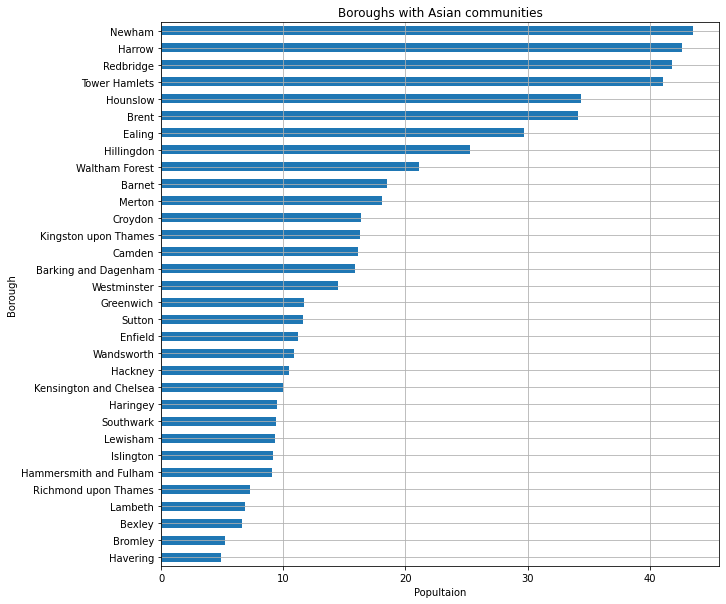

In [49]:
ld_df.set_index('Borough')['Asian'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Popultaion')
plt.title('Boroughs with Asian communities')
plt.show()

I will choose the boroughs most populate with asian and close to each other:

In [250]:
selectedboroughs_df=ld_df.iloc[[0,3]]
selectedboroughs_df


Borough  Latitude  Longitude  White  Mixed  Asian  Black  Other
0         Newham   51.5077     0.0469   29.0    4.5   43.5   19.6    3.5
3  Tower Hamlets   51.5099    -0.0059   45.2    4.1   41.1    7.3    2.3

In [251]:
address = 'Newham, England'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
lat_e = location.latitude
long_e = location.longitude
print('The geograpical coordinate of Newham, UK are {}, {}.'.format(lat_e, long_e))

The geograpical coordinate of Newham, UK are 51.52999955, 0.02931796029382208.


In [393]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[lat_e, long_e], zoom_start=12,)

# add markers to map
for lat, lng, borough, location in zip(selectedboroughs_df['Latitude'], selectedboroughs_df['Longitude'], selectedboroughs_df['Borough'], selectedboroughs_df['Asian']):
    label = '{}, {}'.format(location, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [291]:

from urllib.request import urlopen
import re
URL = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

codes = []
areas_list = []
href_links_list = []
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data0 = data[0]
    area_name = data0.text

    data1 = data[1]
    data1 = data1.text
    borough = data1.split('[')
    borough_name = borough[0]
    data5 = data[5]
    code = data5.text
    code = code.strip()
    
    if borough_name == 'Newham':
        codes.append(code)
        areas_list.append((borough_name,area_name,code))
    if borough_name == 'Tower Hamlets':
        codes.append(code)
        areas_list.append((borough_name,area_name,code))
                                                
for link in soup.findAll('a', attrs={'href': re.compile("^https://tools.wmflabs.org")}):
            htext = link.text
            if htext in codes:
                hlink = link.get('href')
                href_links_list.append((htext, hlink))

In [292]:
df_areas = pd.DataFrame(areas_list, columns=['Borough', 'Area', 'Code'])


In [392]:
df_areas.head()

Borough                           Area      Code
0         Newham                        Beckton  TQ435815
1  Tower Hamlets                  Bethnal Green  TQ345825
2  Tower Hamlets                      Blackwall  TQ385805
3  Tower Hamlets                            Bow  TQ365825
4  Tower Hamlets  Bromley (also Bromley-by-Bow)  TQ375825

In [294]:
areas_links = pd.DataFrame(href_links_list, columns=['Code','href'])


In [295]:
areas_links.columns

Index(['Code', 'href'], dtype='object')

In [296]:
areas_links

Code                                               href
0   TQ435815  https://tools.wmflabs.org/geohack/en/51.514205...
1   TQ345825  https://tools.wmflabs.org/geohack/en/51.525404...
2   TQ385805  https://tools.wmflabs.org/geohack/en/51.506466...
3   TQ365825  https://tools.wmflabs.org/geohack/en/51.524924...
4   TQ375825  https://tools.wmflabs.org/geohack/en/51.524682...
5   TQ348832  https://tools.wmflabs.org/geohack/en/51.531623...
6   TQ375802  https://tools.wmflabs.org/geohack/en/51.504014...
7   TQ405815  https://tools.wmflabs.org/geohack/en/51.514959...
8   TQ385795  https://tools.wmflabs.org/geohack/en/51.497480...
9   TQ408807  https://tools.wmflabs.org/geohack/en/51.507695...
10  TQ425835  https://tools.wmflabs.org/geohack/en/51.532429...
11  TQ405855  https://tools.wmflabs.org/geohack/en/51.550902...
12  TQ375785  https://tools.wmflabs.org/geohack/en/51.488738...
13  TQ394807  https://tools.wmflabs.org/geohack/en/51.508042...
14  TQ365815  https://tools.wmflabs.org/geohack/en/51.515938...
15  TQ435855  https://tools.wmflabs.org/geohack/en/51.550147...
16  TQ425855  https://tools.wmflabs.org/geohack/en/51.550401...
17  TQ391849  https://tools.wmflabs.org/geohack/en/51.545857...
18  TQ365825  https://tools.wmflabs.org/geohack/en/51.524924...
19  TQ375785  https://tools.wmflabs.org/geohack/en/51.488738...
20  TQ435795  https://tools.wmflabs.org/geohack/en/51.496234...
21  TQ365835  https://tools.wmflabs.org/geohack/en/51.533911...
22  TQ405825  https://tools.wmflabs.org/geohack/en/51.523944...
23  TQ375805  https://tools.wmflabs.org/geohack/en/51.506710...
24  TQ355805  https://tools.wmflabs.org/geohack/en/51.507193...
25  TQ355805  https://tools.wmflabs.org/geohack/en/51.507193...
26  TQ415795  https://tools.wmflabs.org/geohack/en/51.496738...
27  TQ335815  https://tools.wmflabs.org/geohack/en/51.516655...
28  TQ355814  https://tools.wmflabs.org/geohack/en/51.515280...
29  TQ385845  https://tools.wmflabs.org/geohack/en/51.542410...
30  TQ333806  https://tools.wmflabs.org/geohack/en/51.508614...
31  TQ405837  https://tools.wmflabs.org/geohack/en/51.534727...
32  TQ345805  https://tools.wmflabs.org/geohack/en/51.507431...
33  TQ405837  https://tools.wmflabs.org/geohack/en/51.534727...
34  TQ335815  https://tools.wmflabs.org/geohack/en/51.516655...
35  TQ435795  https://tools.wmflabs.org/geohack/en/51.496234...

Merging the Areas and href Links DataFrames


In [297]:
cols = areas_links.columns.difference(df_areas.columns)
cols

Index(['href'], dtype='object')

In [298]:
df_areas_links = pd.concat([df_areas, areas_links[cols]], axis=1)


In [299]:
print(df_areas_links.shape)
df_areas_links


(36, 4)


Borough                           Area      Code  \
0          Newham                        Beckton  TQ435815   
1   Tower Hamlets                  Bethnal Green  TQ345825   
2   Tower Hamlets                      Blackwall  TQ385805   
3   Tower Hamlets                            Bow  TQ365825   
4   Tower Hamlets  Bromley (also Bromley-by-Bow)  TQ375825   
5   Tower Hamlets                Cambridge Heath  TQ348832   
6   Tower Hamlets                   Canary Wharf  TQ375802   
7          Newham                   Canning Town  TQ405815   
8   Tower Hamlets                    Cubitt Town  TQ385795   
9          Newham                   Custom House  TQ408807   
10         Newham                       East Ham  TQ425835   
11         Newham                    Forest Gate  TQ405855   
12  Tower Hamlets                   Isle of Dogs  TQ375785   
13  Tower Hamlets                       Leamouth  TQ394807   
14  Tower Hamlets                      Limehouse  TQ365815   
15         Newham                  Little Ilford  TQ435855   
16         Newham                     Manor Park  TQ425855   
17         Newham                       Maryland  TQ391849   
18  Tower Hamlets                       Mile End  TQ365825   
19  Tower Hamlets                       Millwall  TQ375785   
20         Newham                 North Woolwich  TQ435795   
21  Tower Hamlets                       Old Ford  TQ365835   
22         Newham                       Plaistow  TQ405825   
23  Tower Hamlets                         Poplar  TQ375805   
24  Tower Hamlets                       Ratcliff  TQ355805   
25  Tower Hamlets                       Shadwell  TQ355805   
26         Newham                     Silvertown  TQ415795   
27  Tower Hamlets                   Spitalfields  TQ335815   
28  Tower Hamlets                        Stepney  TQ355814   
29         Newham                      Stratford  TQ385845   
30  Tower Hamlets                     Tower Hill  TQ333806   
31         Newham                     Upton Park  TQ405837   
32  Tower Hamlets                        Wapping  TQ345805   
33         Newham                       West Ham  TQ405837   
34  Tower Hamlets                    Whitechapel  TQ335815   
35            NaN                            NaN       NaN   

                                                 href  
0   https://tools.wmflabs.org/geohack/en/51.514205...  
1   https://tools.wmflabs.org/geohack/en/51.525404...  
2   https://tools.wmflabs.org/geohack/en/51.506466...  
3   https://tools.wmflabs.org/geohack/en/51.524924...  
4   https://tools.wmflabs.org/geohack/en/51.524682...  
5   https://tools.wmflabs.org/geohack/en/51.531623...  
6   https://tools.wmflabs.org/geohack/en/51.504014...  
7   https://tools.wmflabs.org/geohack/en/51.514959...  
8   https://tools.wmflabs.org/geohack/en/51.497480...  
9   https://tools.wmflabs.org/geohack/en/51.507695...  
10  https://tools.wmflabs.org/geohack/en/51.532429...  
11  https://tools.wmflabs.org/geohack/en/51.550902...  
12  https://tools.wmflabs.org/geohack/en/51.488738...  
13  https://tools.wmflabs.org/geohack/en/51.508042...  
14  https://tools.wmflabs.org/geohack/en/51.515938...  
15  https://tools.wmflabs.org/geohack/en/51.550147...  
16  https://tools.wmflabs.org/geohack/en/51.550401...  
17  https://tools.wmflabs.org/geohack/en/51.545857...  
18  https://tools.wmflabs.org/geohack/en/51.524924...  
19  https://tools.wmflabs.org/geohack/en/51.488738...  
20  https://tools.wmflabs.org/geohack/en/51.496234...  
21  https://tools.wmflabs.org/geohack/en/51.533911...  
22  https://tools.wmflabs.org/geohack/en/51.523944...  
23  https://tools.wmflabs.org/geohack/en/51.506710...  
24  https://tools.wmflabs.org/geohack/en/51.507193...  
25  https://tools.wmflabs.org/geohack/en/51.507193...  
26  https://tools.wmflabs.org/geohack/en/51.496738...  
27  https://tools.wmflabs.org/geohack/en/51.516655...  
28  https://tools.wmflabs.org/geohack/en/51.515280...  
29  https://tools.wmflabs.org/geoha

Removing the row where there is no data


In [300]:
df_areas_links = df_areas_links.dropna(how='any')
df_areas_links

Borough                           Area      Code  \
0          Newham                        Beckton  TQ435815   
1   Tower Hamlets                  Bethnal Green  TQ345825   
2   Tower Hamlets                      Blackwall  TQ385805   
3   Tower Hamlets                            Bow  TQ365825   
4   Tower Hamlets  Bromley (also Bromley-by-Bow)  TQ375825   
5   Tower Hamlets                Cambridge Heath  TQ348832   
6   Tower Hamlets                   Canary Wharf  TQ375802   
7          Newham                   Canning Town  TQ405815   
8   Tower Hamlets                    Cubitt Town  TQ385795   
9          Newham                   Custom House  TQ408807   
10         Newham                       East Ham  TQ425835   
11         Newham                    Forest Gate  TQ405855   
12  Tower Hamlets                   Isle of Dogs  TQ375785   
13  Tower Hamlets                       Leamouth  TQ394807   
14  Tower Hamlets                      Limehouse  TQ365815   
15         Newham                  Little Ilford  TQ435855   
16         Newham                     Manor Park  TQ425855   
17         Newham                       Maryland  TQ391849   
18  Tower Hamlets                       Mile End  TQ365825   
19  Tower Hamlets                       Millwall  TQ375785   
20         Newham                 North Woolwich  TQ435795   
21  Tower Hamlets                       Old Ford  TQ365835   
22         Newham                       Plaistow  TQ405825   
23  Tower Hamlets                         Poplar  TQ375805   
24  Tower Hamlets                       Ratcliff  TQ355805   
25  Tower Hamlets                       Shadwell  TQ355805   
26         Newham                     Silvertown  TQ415795   
27  Tower Hamlets                   Spitalfields  TQ335815   
28  Tower Hamlets                        Stepney  TQ355814   
29         Newham                      Stratford  TQ385845   
30  Tower Hamlets                     Tower Hill  TQ333806   
31         Newham                     Upton Park  TQ405837   
32  Tower Hamlets                        Wapping  TQ345805   
33         Newham                       West Ham  TQ405837   
34  Tower Hamlets                    Whitechapel  TQ335815   

                                                 href  
0   https://tools.wmflabs.org/geohack/en/51.514205...  
1   https://tools.wmflabs.org/geohack/en/51.525404...  
2   https://tools.wmflabs.org/geohack/en/51.506466...  
3   https://tools.wmflabs.org/geohack/en/51.524924...  
4   https://tools.wmflabs.org/geohack/en/51.524682...  
5   https://tools.wmflabs.org/geohack/en/51.531623...  
6   https://tools.wmflabs.org/geohack/en/51.504014...  
7   https://tools.wmflabs.org/geohack/en/51.514959...  
8   https://tools.wmflabs.org/geohack/en/51.497480...  
9   https://tools.wmflabs.org/geohack/en/51.507695...  
10  https://tools.wmflabs.org/geohack/en/51.532429...  
11  https://tools.wmflabs.org/geohack/en/51.550902...  
12  https://tools.wmflabs.org/geohack/en/51.488738...  
13  https://tools.wmflabs.org/geohack/en/51.508042...  
14  https://tools.wmflabs.org/geohack/en/51.515938...  
15  https://tools.wmflabs.org/geohack/en/51.550147...  
16  https://tools.wmflabs.org/geohack/en/51.550401...  
17  https://tools.wmflabs.org/geohack/en/51.545857...  
18  https://tools.wmflabs.org/geohack/en/51.524924...  
19  https://tools.wmflabs.org/geohack/en/51.488738...  
20  https://tools.wmflabs.org/geohack/en/51.496234...  
21  https://tools.wmflabs.org/geohack/en/51.533911...  
22  https://tools.wmflabs.org/geohack/en/51.523944...  
23  https://tools.wmflabs.org/geohack/en/51.506710...  
24  https://tools.wmflabs.org/geohack/en/51.507193...  
25  https://tools.wmflabs.org/geohack/en/51.507193...  
26  https://tools.wmflabs.org/geohack/en/51.496738...  
27  https://tools.wmflabs.org/geohack/en/51.516655...  
28  https://tools.wmflabs.org/geohack/en/51.515280...  
29  https://tools.wmflabs.org/geohack/en/51.542410...  
30  https://tools.wmflabs.org/geohack/en/

**Geting the geo co-ordinates for all the areas in the selected boroughs**


In [301]:

geo_codes = []
for row in df_areas_links.itertuples():
    url = row.href
    code = row.Code
    res = requests.get(url).text
    soup1 = BeautifulSoup(res,'lxml')
    
    for lat in soup1.find('span',{'class':'latitude'}):
        latitude = lat
        latitude = float(latitude)
            
    for long in soup1.find('span',{'class':'longitude'}):    
        longitude = long
        longitude = float(longitude)
        
    geo_codes.append((code, latitude, longitude))

print(geo_codes)

[('TQ435815', 51.514206, 0.066634), ('TQ345825', 51.525404, -0.062604), ('TQ385805', 51.506466, -0.005767), ('TQ365825', 51.524925, -0.033793), ('TQ375825', 51.524683, -0.019387), ('TQ348832', 51.531623, -0.058015), ('TQ375802', 51.504015, -0.020284), ('TQ405815', 51.514959, 0.023429), ('TQ385795', 51.49748, -0.00616), ('TQ408807', 51.507696, 0.027431), ('TQ425835', 51.53243, 0.053041), ('TQ405855', 51.550902, 0.025024), ('TQ375785', 51.488738, -0.020945), ('TQ394807', 51.508043, 0.007271), ('TQ365815', 51.515939, -0.03418), ('TQ435855', 51.550148, 0.068263), ('TQ425855', 51.550401, 0.05385), ('TQ391849', 51.545857, 0.004608), ('TQ365825', 51.524925, -0.033793), ('TQ375785', 51.488738, -0.020945), ('TQ435795', 51.496234, 0.065821), ('TQ365835', 51.533911, -0.033406), ('TQ405825', 51.523945, 0.023828), ('TQ375805', 51.50671, -0.020167), ('TQ355805', 51.507193, -0.048967), ('TQ355805', 51.507193, -0.048967), ('TQ415795', 51.496738, 0.037029), ('TQ335815', 51.516655, -0.077389), ('TQ35581

**Creating a new datafame with the geo co-ordinates.**

In [302]:
df_geo_codes = pd.DataFrame(geo_codes, columns=['Code','Latitude','Longitude'])
df_geo_codes

Code   Latitude  Longitude
0   TQ435815  51.514206   0.066634
1   TQ345825  51.525404  -0.062604
2   TQ385805  51.506466  -0.005767
3   TQ365825  51.524925  -0.033793
4   TQ375825  51.524683  -0.019387
5   TQ348832  51.531623  -0.058015
6   TQ375802  51.504015  -0.020284
7   TQ405815  51.514959   0.023429
8   TQ385795  51.497480  -0.006160
9   TQ408807  51.507696   0.027431
10  TQ425835  51.532430   0.053041
11  TQ405855  51.550902   0.025024
12  TQ375785  51.488738  -0.020945
13  TQ394807  51.508043   0.007271
14  TQ365815  51.515939  -0.034180
15  TQ435855  51.550148   0.068263
16  TQ425855  51.550401   0.053850
17  TQ391849  51.545857   0.004608
18  TQ365825  51.524925  -0.033793
19  TQ375785  51.488738  -0.020945
20  TQ435795  51.496234   0.065821
21  TQ365835  51.533911  -0.033406
22  TQ405825  51.523945   0.023828
23  TQ375805  51.506710  -0.020167
24  TQ355805  51.507193  -0.048967
25  TQ355805  51.507193  -0.048967
26  TQ415795  51.496738   0.037029
27  TQ335815  51.516655  -0.077389
28  TQ355814  51.515281  -0.048621
29  TQ385845  51.542410  -0.004196
30  TQ333806  51.508615  -0.080609
31  TQ405837  51.534728   0.024306
32  TQ345805  51.507432  -0.063367
33  TQ405837  51.534728   0.024306
34  TQ335815  51.516655  -0.077389

**Merging the informations.**

In [303]:
cols = df_geo_codes.columns.difference(df_areas.columns)
cols


Index(['Latitude', 'Longitude'], dtype='object')

In [398]:
boroughs = pd.concat([df_areas, df_geo_codes[cols]], axis=1)
boroughs.head()

Borough                           Area      Code   Latitude  \
0         Newham                        Beckton  TQ435815  51.514206   
1  Tower Hamlets                  Bethnal Green  TQ345825  51.525404   
2  Tower Hamlets                      Blackwall  TQ385805  51.506466   
3  Tower Hamlets                            Bow  TQ365825  51.524925   
4  Tower Hamlets  Bromley (also Bromley-by-Bow)  TQ375825  51.524683   

   Longitude  
0   0.066634  
1  -0.062604  
2  -0.005767  
3  -0.033793  
4  -0.019387

Renaming the 'Area' column to 'Neighborhood' and droping the code column

In [399]:
boroughs = boroughs.rename(columns={'Area' :'Neighborhood'})
boroughs.drop(['Code'], axis=1, inplace=True)
boroughs.head(10)


Borough                   Neighborhood   Latitude  Longitude
0         Newham                        Beckton  51.514206   0.066634
1  Tower Hamlets                  Bethnal Green  51.525404  -0.062604
2  Tower Hamlets                      Blackwall  51.506466  -0.005767
3  Tower Hamlets                            Bow  51.524925  -0.033793
4  Tower Hamlets  Bromley (also Bromley-by-Bow)  51.524683  -0.019387
5  Tower Hamlets                Cambridge Heath  51.531623  -0.058015
6  Tower Hamlets                   Canary Wharf  51.504015  -0.020284
7         Newham                   Canning Town  51.514959   0.023429
8  Tower Hamlets                    Cubitt Town  51.497480  -0.006160
9         Newham                   Custom House  51.507696   0.027431

In [306]:
# create map of Newham using latitude and longitude values
map_boroughs = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(boroughs['Latitude'], boroughs['Longitude'], boroughs['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='olive',
        fill=True,
        fill_color='#808000',
        fill_opacity=0.7).add_to(map_boroughs)  
    
map_boroughs

**Utilizing the Foursquare API to explore the neighborhoods and segment them**  
Defining Foursquare Credentials and Version

In [307]:
CLIENT_ID = 'HZYIPX2XXXGTYTSLPUBJFKVIR4T4DYVCLBZDHD53X1H100I4' # your Foursquare ID
CLIENT_SECRET = 'NMUN5PRTRYM2FBNQJ3SJKPUXYYCLR2EXRHYPMML2B5GHYY1K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HZYIPX2XXXGTYTSLPUBJFKVIR4T4DYVCLBZDHD53X1H100I4
CLIENT_SECRET:NMUN5PRTRYM2FBNQJ3SJKPUXYYCLR2EXRHYPMML2B5GHYY1K


## Explore Neighborhoods:
* **create a function to build new a dataframe to work with all the neighborhoods in the previous table:**

In [308]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [309]:
boroughs_venues = getNearbyVenues(names= boroughs['Neighborhood'],
                                   latitudes= boroughs['Latitude'],
                                   longitudes= boroughs['Longitude']
                                  )

Beckton
Bethnal Green
Blackwall
Bow
Bromley (also Bromley-by-Bow)
Cambridge Heath
Canary Wharf
Canning Town
Cubitt Town
Custom House
East Ham
Forest Gate
Isle of Dogs
Leamouth
Limehouse
Little Ilford
Manor Park
Maryland
Mile End
Millwall
North Woolwich
Old Ford
Plaistow
Poplar
Ratcliff
Shadwell
Silvertown
Spitalfields
Stepney
Stratford
Tower Hill
Upton Park
Wapping
West Ham
Whitechapel


**checking the size of the resulting dataframe:**

In [310]:
print(boroughs_venues.shape)
boroughs_venues.head()

(2326, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Beckton              51.514206                0.066634   
1      Beckton              51.514206                0.066634   
2      Beckton              51.514206                0.066634   
3      Beckton              51.514206                0.066634   
4      Beckton              51.514206                0.066634   

                         Venue  Venue Latitude  Venue Longitude  \
0  East london Gymnastics Club       51.514107         0.060155   
1                Home Bargains       51.516805         0.062804   
2                    Lituanica       51.516442         0.062927   
3      The Reach Bar + Kitchen       51.506730         0.073015   
4                 Pets at Home       51.520473         0.070494   

         Venue Category  
0  Gym / Fitness Center  
1        Discount Store  
2         Grocery Store  
3             Gastropub  
4             Pet Store

**checking how many venues were returned for each neighborhood:**

In [311]:
boroughs_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                   
Beckton                                           38                      38   
Bethnal Green                                    100                     100   
Blackwall                                        100                     100   
Bow                                               35                      35   
Bromley (also Bromley-by-Bow)                     35                      35   
Cambridge Heath                                  100                     100   
Canary Wharf                                     100                     100   
Canning Town                                      60                      60   
Cubitt Town                                       89                      89   
Custom House                                      70                      70   
East Ham                                          29                      29   
Forest Gate                                       23                      23   
Isle of Dogs                                      73                      73   
Leamouth                                          99                      99   
Limehouse                                         63                      63   
Little Ilford                                     21                      21   
Manor Park                                        18                      18   
Maryland                                          96                      96   
Mile End                                          35                      35   
Millwall                                          73                      73   
North Woolwich                                    63                      63   
Old Ford                                          86                      86   
Plaistow                                          14                      14   
Poplar                                           100                     100   
Ratcliff                                          77                      77   
Shadwell                                          77                      77   
Silvertown                                        23                      23   
Spitalfields                                     100                     100   
Stepney                                           89                      89   
Stratford                                        100                     100   
Tower Hill                                       100                     100   
Upton Park                                        20                      20   
Wapping                                          100                     100   
West Ham                                          20                      20   
Whitechapel                                      100                     100   

                               Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                            
Beckton                           38              38               38   
Bethnal Green                    100             100              100   
Blackwall                        100             100              100   
Bow                               35              35               35   
Bromley (also Bromley-by-Bow)     35              35               35   
Cambridge Heath                  100             100              100   
Canary Wharf                     100             100              100   
Canning Town                      60              60               60   
Cubitt Town                       89              89               89   
Custom House                      70              70               70   
East Ham                          29              29               29   
Forest Gate                       23              23               23   
Isle of Dogs                      73            

**How many unique categories can be curated from all the returned venues?**

In [312]:
print('There are {} uniques categories.'.format(len(boroughs_venues['Venue Category'].unique())))

There are 248 uniques categories.


## Analyze Each Neighborhood

In [313]:
# one hot encoding
boroughs_onehot = pd.get_dummies(boroughs_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boroughs_onehot['Neighborhood'] = boroughs_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [boroughs_onehot.columns[-1]] + list(boroughs_onehot.columns[:-1])
boroughs_onehot = boroughs_onehot[fixed_columns]

boroughs_onehot.head()

Neighborhood  Accessories Store  African Restaurant  Airport Terminal  \
0      Beckton                  0                   0                 0   
1      Beckton                  0                   0                 0   
2      Beckton                  0                   0                 0   
3      Beckton                  0                   0                 0   
4      Beckton                  0                   0                 0   

   American Restaurant  Antique Shop  Arepa Restaurant  \
0                    0             0                 0   
1                    0             0                 0   
2                    0             0                 0   
3                    0             0                 0   
4                    0             0                 0   

   Argentinian Restaurant  Art Gallery  Arts & Crafts Store  ...  \
0                       0            0                    0  ...   
1                       0            0                    0  ...   
2                       0            0                    0  ...   
3                       0            0                    0  ...   
4                       0            0                    0  ...   

   Video Game Store  Vietnamese Restaurant  Warehouse Store  Waterfront  \
0                 0                      0                0           0   
1                 0                      0                0           0   
2                 0                      0                0           0   
3                 0                      0                0           0   
4                 0                      0                0           0   

   Whisky Bar  Wine Bar  Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0           0         0          0            0              0            0  
1           0         0          0            0              0            0  
2           0         0          0            0              0            0  
3           0         0          0            0              0            0  
4           0         0          0            0              0            0  

[5 rows x 249 columns]

In [314]:
boroughs_grouped = boroughs_onehot.groupby('Neighborhood').mean().reset_index()
boroughs_grouped

Neighborhood  Accessories Store  African Restaurant  \
0                         Beckton           0.000000            0.000000   
1                   Bethnal Green           0.000000            0.000000   
2                       Blackwall           0.000000            0.000000   
3                             Bow           0.000000            0.000000   
4   Bromley (also Bromley-by-Bow)           0.000000            0.000000   
5                 Cambridge Heath           0.000000            0.000000   
6                    Canary Wharf           0.000000            0.000000   
7                    Canning Town           0.000000            0.000000   
8                     Cubitt Town           0.000000            0.000000   
9                    Custom House           0.000000            0.000000   
10                       East Ham           0.000000            0.000000   
11                    Forest Gate           0.000000            0.000000   
12                   Isle of Dogs           0.000000            0.000000   
13                       Leamouth           0.000000            0.000000   
14                      Limehouse           0.000000            0.000000   
15                  Little Ilford           0.000000            0.000000   
16                     Manor Park           0.000000            0.000000   
17                       Maryland           0.010417            0.000000   
18                       Mile End           0.000000            0.000000   
19                       Millwall           0.000000            0.000000   
20                 North Woolwich           0.000000            0.015873   
21                       Old Ford           0.000000            0.000000   
22                       Plaistow           0.000000            0.000000   
23                         Poplar           0.000000            0.000000   
24                       Ratcliff           0.000000            0.000000   
25                       Shadwell           0.000000            0.000000   
26                     Silvertown           0.000000            0.000000   
27                   Spitalfields           0.000000            0.000000   
28                        Stepney           0.000000            0.000000   
29                      Stratford           0.010000            0.000000   
30                     Tower Hill           0.000000            0.000000   
31                     Upton Park           0.000000            0.000000   
32                        Wapping           0.000000            0.000000   
33                       West Ham           0.000000            0.000000   
34                    Whitechapel           0.000000            0.000000   

    Airport Terminal  American Restaurant  Antique Shop  Arepa Restaurant  \
0           0.000000             0.000000      0.000000              0.00   
1           0.000000             0.000000      0.000000              0.00   
2           0.000000             0.000000      0.000000              0.00   
3           0.000000             0.000000      0.000000              0.00   
4           0.000000             0.000000      0.000000              0.00   
5           0.000000             0.000000      0.000000              0.01   
6           0.000000             0.000000      0.000000              0.00   
7           0.000000             0.000000      0.000000              0.00   
8           0.000000             0.022472      0.000000              0.00   
9           0.014286             0.014286      0.000000              0.00   
10          0.000000             0.000000      0.000000              0.00   
11          0.000000             0.000000      0.000000              0.00   
12          0.000000             0.000000      0.000000              0.00   
13          0.000000             0.020202      0.000000              0.00   
14          0.000000             0.000000      0.000000              0.00   
15          0.000000             0.000000      0.000

In [315]:
boroughs_grouped.shape

(35, 249)

Top 5 venues for each Neighborhood:

In [316]:
num_top_rest = 5

for hood in boroughs_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boroughs_grouped[boroughs_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_rest))
    print('\n')

----Beckton----
                    venue  freq
0             Supermarket  0.11
1  Furniture / Home Store  0.08
2          Clothing Store  0.08
3             Coffee Shop  0.08
4      Light Rail Station  0.05


----Bethnal Green----
          venue  freq
0   Coffee Shop  0.12
1          Café  0.08
2           Pub  0.07
3  Cocktail Bar  0.04
4      Wine Bar  0.03


----Blackwall----
                venue  freq
0         Coffee Shop  0.08
1        Burger Joint  0.05
2               Hotel  0.04
3                Park  0.04
4  Italian Restaurant  0.04


----Bow----
          venue  freq
0           Pub  0.17
1          Café  0.09
2          Park  0.06
3    Canal Lock  0.06
4  Burger Joint  0.06


----Bromley (also Bromley-by-Bow)----
           venue  freq
0            Pub  0.23
1       Bus Stop  0.09
2            Gym  0.06
3            Bar  0.06
4  Historic Site  0.06


----Cambridge Heath----
          venue  freq
0   Coffee Shop  0.13
1           Pub  0.10
2          Café  0.06
3      Win

In [317]:

# A function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [318]:

#Creating a new dataframe and displaying the top 10 venues based on occurance for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boroughs_grouped['Neighborhood']


for ind in np.arange(boroughs_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boroughs_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0                        Beckton           Supermarket           Coffee Shop   
1                  Bethnal Green           Coffee Shop                  Café   
2                      Blackwall           Coffee Shop          Burger Joint   
3                            Bow                   Pub                  Café   
4  Bromley (also Bromley-by-Bow)                   Pub              Bus Stop   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0        Clothing Store  Furniture / Home Store  Gym / Fitness Center   
1                   Pub            Cocktail Bar              Wine Bar   
2                 Hotel      Italian Restaurant                  Park   
3           Pizza Place              Canal Lock                  Park   
4         Historic Site                     Gym         Grocery Store   

  6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
0        Shopping Plaza    Light Rail Station  Portuguese Restaurant   
1              Beer Bar     Indian Restaurant             Bagel Shop   
2                  Café                Lounge                  Plaza   
3          Burger Joint           Coffee Shop         Sandwich Place   
4                  Park                   Bar           Burger Joint   

  9th Most Common Venue 10th Most Common Venue  
0                  Park         Discount Store  
1                Market                   Farm  
2    English Restaurant          Movie Theater  
3            Restaurant           Climbing Gym  
4                  Café             Canal Lock

# Custering Neighborhoods using K-means  


In [319]:

# set number of clusters
kclusters = 5

boroughs_grouped_clustering = boroughs_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boroughs_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 4, 0, 2, 0, 4, 4, 4, 4])

### Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [320]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

boroughs_merged = boroughs_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
boroughs_merged = boroughs_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
boroughs_merged.fillna(0)
boroughs_merged.head() # check the last columns!

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Beckton              51.514206                0.066634   
1      Beckton              51.514206                0.066634   
2      Beckton              51.514206                0.066634   
3      Beckton              51.514206                0.066634   
4      Beckton              51.514206                0.066634   

                         Venue  Venue Latitude  Venue Longitude  \
0  East london Gymnastics Club       51.514107         0.060155   
1                Home Bargains       51.516805         0.062804   
2                    Lituanica       51.516442         0.062927   
3      The Reach Bar + Kitchen       51.506730         0.073015   
4                 Pets at Home       51.520473         0.070494   

         Venue Category  Cluster Labels 1st Most Common Venue  \
0  Gym / Fitness Center               4           Supermarket   
1        Discount Store               4           Supermarket   
2         Grocery Store               4           Supermarket   
3             Gastropub               4           Supermarket   
4             Pet Store               4           Supermarket   

  2nd Most Common Venue 3rd Most Common Venue   4th Most Common Venue  \
0           Coffee Shop        Clothing Store  Furniture / Home Store   
1           Coffee Shop        Clothing Store  Furniture / Home Store   
2           Coffee Shop        Clothing Store  Furniture / Home Store   
3           Coffee Shop        Clothing Store  Furniture / Home Store   
4           Coffee Shop        Clothing Store  Furniture / Home Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0  Gym / Fitness Center        Shopping Plaza    Light Rail Station   
1  Gym / Fitness Center        Shopping Plaza    Light Rail Station   
2  Gym / Fitness Center        Shopping Plaza    Light Rail Station   
3  Gym / Fitness Center        Shopping Plaza    Light Rail Station   
4  Gym / Fitness Center        Shopping Plaza    Light Rail Station   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0  Portuguese Restaurant                  Park         Discount Store  
1  Portuguese Restaurant                  Park         Discount Store  
2  Portuguese Restaurant                  Park         Discount Store  
3  Portuguese Restaurant                  Park         Discount Store  
4  Portuguese Restaurant                  Park         Discount Store

**Number of venues belonging to each cluster**

In [321]:
boroughs_merged['Cluster Labels'].value_counts()


4    1100
0     858
2     336
1      18
3      14
Name: Cluster Labels, dtype: int64

## Map with the clusters

In [322]:
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, vc in zip(boroughs_merged['Venue Latitude'], boroughs_merged['Venue Longitude'], boroughs_merged['Venue'], boroughs_merged['Cluster Labels'], boroughs_merged['Venue Category']):
    label = folium.Popup(str(poi) +' (' +str(vc) + ') ['+ str(cluster)+']', parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

## Analysis of each cluster

### Cluster 1

In [323]:
c1 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 0, boroughs_merged.columns[[0]+list(range(8, boroughs_merged.shape[1]))]]
c1.drop_duplicates()


Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
38      Bethnal Green           Coffee Shop                  Café   
238               Bow                   Pub                  Café   
308   Cambridge Heath           Coffee Shop                   Pub   
951         Limehouse                  Park           Coffee Shop   
1053         Maryland                   Pub         Grocery Store   
1149         Mile End                   Pub                  Café   
1320         Old Ford                   Pub                  Café   
1520         Ratcliff                   Pub                  Park   
1597         Shadwell                   Pub                  Park   
1797          Stepney                   Pub         Grocery Store   
2106          Wapping                   Pub           Coffee Shop   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
38                     Pub          Cocktail Bar              Wine Bar   
238            Pizza Place            Canal Lock                  Park   
308                   Café              Wine Bar          Cocktail Bar   
951                    Pub            Canal Lock                  Café   
1053           Pizza Place                  Café                 Hotel   
1149           Pizza Place            Canal Lock                  Park   
1320                  Park           Pizza Place           Coffee Shop   
1520         Grocery Store           Coffee Shop    Italian Restaurant   
1597         Grocery Store           Coffee Shop    Italian Restaurant   
1797                  Park                 Hotel        Sandwich Place   
2106                 Hotel    Italian Restaurant                  Park   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
38                Beer Bar     Indian Restaurant            Bagel Shop   
238           Burger Joint           Coffee Shop        Sandwich Place   
308                 Bakery            Restaurant                 Hotel   
951                  Hotel     Indian Restaurant           Pizza Place   
1053        Clothing Store                  Park    Italian Restaurant   
1149          Burger Joint           Coffee Shop        Sandwich Place   
1320         Grocery Store             Wine Shop             Gastropub   
1520                  Café                 Hotel    Chinese Restaurant   
1597                  Café                 Hotel    Chinese Restaurant   
1797           Coffee Shop  Gym / Fitness Center    Chinese Restaurant   
2106     Indian Restaurant        History Museum        Sandwich Place   

     9th Most Common Venue 10th Most Common Venue  
38                  Market                   Farm  
238             Restaurant           Climbing Gym  
308              Bookstore            Flower Shop  
951     Italian Restaurant          Grocery Store  
1053           Coffee Shop                    Bar  
1149            Restaurant           Climbing Gym  
1320            Canal Lock            Art Gallery  
1520    Athletics & Sports      Indian Restaurant  
1597    Athletics & Sports      Indian Restaurant  
1797     Indian Restaurant     Italian Restaurant  
2106                   Bar                   Café

In [324]:
c1_table = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 0, boroughs_merged.columns[[0]+[3]+[4]+[5]+list(range(8, boroughs_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c1_table['Venue Latitude'], c1_table['Venue Longitude'], c1_table['Venue'], c1_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [325]:
c1=c1.drop_duplicates()
print(c1.shape)
print(c1.groupby('Neighborhood').size())
print(c1.groupby('1st Most Common Venue').size())


(11, 11)
Neighborhood
Bethnal Green      1
Bow                1
Cambridge Heath    1
Limehouse          1
Maryland           1
Mile End           1
Old Ford           1
Ratcliff           1
Shadwell           1
Stepney            1
Wapping            1
dtype: int64
1st Most Common Venue
Coffee Shop    2
Park           1
Pub            8
dtype: int64


### Cluster 2

In [327]:
c2 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 1, boroughs_merged.columns[[0]+list(range(8, boroughs_merged.shape[1]))]]
c2.drop_duplicates()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1035   Manor Park     Indian Restaurant            Restaurant   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1035                  Park  Gym / Fitness Center         Train Station   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1035                 Hotel                   Pub         Grocery Store   

     9th Most Common Venue 10th Most Common Venue  
1035           Gas Station            Auto Garage

In [401]:
c2_table = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 1, boroughs_merged.columns[[0]+[3]+[4]+[5]+list(range(8, boroughs_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c2_table['Venue Latitude'], c2_table['Venue Longitude'], c2_table['Venue'], c2_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [328]:
c2= c2.drop_duplicates()
print(c2.shape)
print(c2.groupby('Neighborhood').size())
print(c2.groupby('1st Most Common Venue').size())


(1, 11)
Neighborhood
Manor Park    1
dtype: int64
1st Most Common Venue
Indian Restaurant    1
dtype: int64


### Cluster 3

In [329]:
c3 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 2, boroughs_merged.columns[[0]+list(range(8, boroughs_merged.shape[1]))]]
c3.drop_duplicates()

Neighborhood 1st Most Common Venue  \
273   Bromley (also Bromley-by-Bow)                   Pub   
727                        East Ham                   Pub   
756                     Forest Gate                   Pub   
779                    Isle of Dogs                   Pub   
1184                       Millwall                   Pub   
1257                 North Woolwich                   Pub   
2086                     Upton Park                   Pub   
2206                       West Ham                   Pub   

     2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
273               Bus Stop         Historic Site                   Gym   
727          Grocery Store  Fast Food Restaurant     Indian Restaurant   
756          Grocery Store                  Café              Bus Stop   
779          Boat or Ferry         Grocery Store                  Café   
1184         Boat or Ferry         Grocery Store                  Café   
1257         Grocery Store           Supermarket           Coffee Shop   
2086         Grocery Store                Bakery        Soccer Stadium   
2206         Grocery Store                Bakery        Soccer Stadium   

     5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
273          Grocery Store                  Park                      Bar   
727                   Park        Sandwich Place              Supermarket   
756               Wine Bar            Restaurant  Comfort Food Restaurant   
779            Supermarket     Indian Restaurant                    Trail   
1184           Supermarket     Indian Restaurant                    Trail   
1257        Clothing Store                  Pier                    Plaza   
2086              Boutique              Bus Stop            Shopping Mall   
2206              Boutique              Bus Stop            Shopping Mall   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
273           Burger Joint                  Café             Canal Lock  
727            Coffee Shop      Toy / Game Store         Clothing Store  
756   Fast Food Restaurant     Indian Restaurant      Fish & Chips Shop  
779        Harbor / Marina                  Park  Vietnamese Restaurant  
1184       Harbor / Marina                  Park  Vietnamese Restaurant  
1257              Platform                Bakery                  Hotel  
2086                Market                  Café          Metro Station  
2206                Market                  Café          Metro Station

In [403]:
c3_table = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 2, boroughs_merged.columns[[0]+[3]+[4]+[5]+list(range(8, boroughs_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c3_table['Venue Latitude'], c3_table['Venue Longitude'], c3_table['Venue'], c3_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [330]:
c3= c3.drop_duplicates()
print(c3.shape)
print(c3.groupby('Neighborhood').size())
print(c3.groupby('1st Most Common Venue').size())


(8, 11)
Neighborhood
Bromley (also Bromley-by-Bow)    1
East Ham                         1
Forest Gate                      1
Isle of Dogs                     1
Millwall                         1
North Woolwich                   1
Upton Park                       1
West Ham                         1
dtype: int64
1st Most Common Venue
Pub    8
dtype: int64


### Cluster 4

In [331]:
c4 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 3, boroughs_merged.columns[[0]+list(range(8, boroughs_merged.shape[1]))]]
c4.drop_duplicates()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1406     Plaistow                  Café  Gym / Fitness Center   

     3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
1406                   Pub           Gas Station  Vietnamese Restaurant   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1406          Tennis Court  Fast Food Restaurant         Grocery Store   

     9th Most Common Venue 10th Most Common Venue  
1406         Metro Station                  Hotel

In [408]:
c4_table = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 3, boroughs_merged.columns[[0]+[3]+[4]+[5]+list(range(8, boroughs_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c4_table['Venue Latitude'], c4_table['Venue Longitude'], c4_table['Venue'], c4_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [332]:
c4= c4.drop_duplicates()
print(c4.shape)
print(c4.groupby('Neighborhood').size())
print(c4.groupby('1st Most Common Venue').size())


(1, 11)
Neighborhood
Plaistow    1
dtype: int64
1st Most Common Venue
Café    1
dtype: int64


### Cluster 5

In [411]:
c5 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 4, boroughs_merged.columns[[0,1,2]+list(range(8, boroughs_merged.shape[1]))]]
c5.drop_duplicates()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           Beckton              51.514206                0.066634   
138       Blackwall              51.506466               -0.005767   
408    Canary Wharf              51.504015               -0.020284   
508    Canning Town              51.514959                0.023429   
568     Cubitt Town              51.497480               -0.006160   
657    Custom House              51.507696                0.027431   
852        Leamouth              51.508043                0.007271   
1014  Little Ilford              51.550148                0.068263   
1420         Poplar              51.506710               -0.020167   
1674     Silvertown              51.496738                0.037029   
1697   Spitalfields              51.516655               -0.077389   
1886      Stratford              51.542410               -0.004196   
1986     Tower Hill              51.508615               -0.080609   
2226    Whitechapel              51.516655               -0.077389   

     1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0              Supermarket           Coffee Shop        Clothing Store   
138            Coffee Shop          Burger Joint                 Hotel   
408                  Hotel           Coffee Shop                  Park   
508                  Hotel         Grocery Store                  Café   
568            Coffee Shop                   Bar                 Hotel   
657                  Hotel    Light Rail Station    Chinese Restaurant   
852            Coffee Shop                 Hotel    Italian Restaurant   
1014         Grocery Store           Gas Station         Movie Theater   
1420                  Park           Coffee Shop                 Hotel   
1674                  Park                  Café         Grocery Store   
1697                 Hotel           Coffee Shop  Gym / Fitness Center   
1886                  Café                   Pub    Italian Restaurant   
1986                 Hotel           Coffee Shop  Gym / Fitness Center   
2226                 Hotel           Coffee Shop  Gym / Fitness Center   

       4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0     Furniture / Home Store  Gym / Fitness Center        Shopping Plaza   
138       Italian Restaurant                  Park                  Café   
408     Gym / Fitness Center        Sandwich Place            Steakhouse   
508                      Pub  Gym / Fitness Center                Bakery   
568        Indian Restaurant       Harbor / Marina                  Park   
657                      Pub                  Café           Coffee Shop   
852                      Bar  Gym / Fitness Center                Lounge   
1014            Dessert Shop           Supermarket             Newsstand   
1420      Italian Restaurant  Gym / Fitness Center          Burger Joint   
1674                  Tunnel  Fast Food Restaurant                Museum   
1697             Pizza Place            Food Truck     French Restaurant   
1886          Ice Cream Shop                 Hotel                  Park   
1986      Seafood Restaurant        Scenic Lookout            Restaurant   
2226             Pizza Place            Food Truck     French Restaurant   

     7th Most Common Venue  8th Most Common Venue   9th Most Common Venue  \
0       Light Rail Station  Portuguese Restaurant                    Park   
138                 Lounge                  Plaza      English Restaurant   
408     Italian Restaurant      Indian Restaurant                   Plaza   
508         Sandwich Place     Italian Restaurant      Chinese Restaurant   
568                 Lounge            Music Venue               Hotel Bar   
657                   Park      Convenience Store           Grocery Store   
852           Burger Joint                   Café           Grocery Store   
1014                  Park                 Bakery           Train Station   
1420       

In [416]:
# create map of Newham using latitude and longitude values
map_boroughs = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(c5['Neighborhood Latitude'], c5['Neighborhood Longitude'], c5['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='red',
        fill_opacity=0.5).add_to(map_boroughs)  


map_boroughs

In [413]:
print(c5.shape)
print(c5.groupby('Neighborhood').size())
print(c5.groupby('1st Most Common Venue').size())


(1100, 13)
Neighborhood
Beckton           38
Blackwall        100
Canary Wharf     100
Canning Town      60
Cubitt Town       89
Custom House      70
Leamouth          99
Little Ilford     21
Poplar           100
Silvertown        23
Spitalfields     100
Stratford        100
Tower Hill       100
Whitechapel      100
dtype: int64
1st Most Common Venue
Café             100
Coffee Shop      288
Grocery Store     21
Hotel            530
Park             123
Supermarket       38
dtype: int64


In [424]:
c5hotels= c5.drop_duplicates()

neigh = ["Canary Wharf", "Canning Town","Custom House", "Spitalfields", "Tower Hill","Whitechapel"]
c5hotels=c5.loc[c5["Neighborhood"].isin(neigh)]
c5hotels



Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
408   Canary Wharf              51.504015               -0.020284   
409   Canary Wharf              51.504015               -0.020284   
410   Canary Wharf              51.504015               -0.020284   
411   Canary Wharf              51.504015               -0.020284   
412   Canary Wharf              51.504015               -0.020284   
413   Canary Wharf              51.504015               -0.020284   
414   Canary Wharf              51.504015               -0.020284   
415   Canary Wharf              51.504015               -0.020284   
416   Canary Wharf              51.504015               -0.020284   
417   Canary Wharf              51.504015               -0.020284   
418   Canary Wharf              51.504015               -0.020284   
419   Canary Wharf              51.504015               -0.020284   
420   Canary Wharf              51.504015               -0.020284   
421   Canary Wharf              51.504015               -0.020284   
422   Canary Wharf              51.504015               -0.020284   
423   Canary Wharf              51.504015               -0.020284   
424   Canary Wharf              51.504015               -0.020284   
425   Canary Wharf              51.504015               -0.020284   
426   Canary Wharf              51.504015               -0.020284   
427   Canary Wharf              51.504015               -0.020284   
428   Canary Wharf              51.504015               -0.020284   
429   Canary Wharf              51.504015               -0.020284   
430   Canary Wharf              51.504015               -0.020284   
431   Canary Wharf              51.504015               -0.020284   
432   Canary Wharf              51.504015               -0.020284   
433   Canary Wharf              51.504015               -0.020284   
434   Canary Wharf              51.504015               -0.020284   
435   Canary Wharf              51.504015               -0.020284   
436   Canary Wharf              51.504015               -0.020284   
437   Canary Wharf              51.504015               -0.020284   
438   Canary Wharf              51.504015               -0.020284   
439   Canary Wharf              51.504015               -0.020284   
440   Canary Wharf              51.504015               -0.020284   
441   Canary Wharf              51.504015               -0.020284   
442   Canary Wharf              51.504015               -0.020284   
443   Canary Wharf              51.504015               -0.020284   
444   Canary Wharf              51.504015               -0.020284   
445   Canary Wharf              51.504015               -0.020284   
446   Canary Wharf              51.504015               -0.020284   
447   Canary Wharf              51.504015               -0.020284   
448   Canary Wharf              51.504015               -0.020284   
449   Canary Wharf              51.504015               -0.020284   
450   Canary Wharf              51.504015               -0.020284   
451   Canary Wharf              51.504015               -0.020284   
452   Canary Wharf              51.504015               -0.020284   
453   Canary Wharf              51.504015               -0.020284   
454   Canary Wharf              51.504015               -0.020284   
455   Canary Wharf              51.504015               -0.020284   
456   Canary Wharf              51.504015               -0.020284   
457   Canary Wharf              51.504015               -0.020284   
458   Canary Wharf              51.504015               -0.020284   
459   Canary Wharf              51.504015               -0.020284   
460   Canary Wharf              51.504015               -0.020284   
461   Canary Wharf              51.504015               -0.020284   
462   Canary Wharf              51.504015               -0.020284   
463   Canary Wharf              51.504015               -0.020284   
464   Canary Wharf              51.504015               -0.020284   
465 

# Results

**In order to reduce risks, the most appropriate places to open a new restaurant would be in the neighborhoods above, considering that the hotels are the first most common venue in theses areas, followed by a great variety of other business. These place is also known by their asian community and culture.**


In [426]:
c5hotels=c5hotels.drop_duplicates()
c5hotels.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
408   Canary Wharf              51.504015               -0.020284   
508   Canning Town              51.514959                0.023429   
657   Custom House              51.507696                0.027431   
1697  Spitalfields              51.516655               -0.077389   
1986    Tower Hill              51.508615               -0.080609   

     1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
408                  Hotel           Coffee Shop                  Park   
508                  Hotel         Grocery Store                  Café   
657                  Hotel    Light Rail Station    Chinese Restaurant   
1697                 Hotel           Coffee Shop  Gym / Fitness Center   
1986                 Hotel           Coffee Shop  Gym / Fitness Center   

     4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
408   Gym / Fitness Center        Sandwich Place            Steakhouse   
508                    Pub  Gym / Fitness Center                Bakery   
657                    Pub                  Café           Coffee Shop   
1697           Pizza Place            Food Truck     French Restaurant   
1986    Seafood Restaurant        Scenic Lookout            Restaurant   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
408     Italian Restaurant     Indian Restaurant                 Plaza   
508         Sandwich Place    Italian Restaurant    Chinese Restaurant   
657                   Park     Convenience Store         Grocery Store   
1697                   Pub    Italian Restaurant   Japanese Restaurant   
1986    Italian Restaurant     French Restaurant            Food Truck   

     10th Most Common Venue  
408            Burger Joint  
508    Fast Food Restaurant  
657               Hotel Bar  
1697      Korean Restaurant  
1986         History Museum

In [418]:
# create map of Newham using latitude and longitude values
map_boroughs = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(c5hotels['Neighborhood Latitude'], c5hotels['Neighborhood Longitude'], c5hotels['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='pink',
        fill_opacity=0.5).add_to(map_boroughs)  


map_boroughs